# Pearson Correlation

**Author:** Muhammad Faran Khalid

In this notebook I calculate the Pearson correlation for the Dissolved Organic Carbon (DOC) in our lake chemistry dataset.

In [ ]:
# imports
import pandas as pd
import numpy as np

In [ ]:
#Loading dataset
df = pd.read_csv('/content/drive/MyDrive/Watershed Project/data/LakeChem 2001-2022 Surface Season cleaned.csv')

In [ ]:
# Potential features to check for correlation with DOC
features = [
    'TOC (mg/l C)', 'Abs_F 254 (/5cm)', 'Abs_F 365 (/5cm)', 'Abs_F 420 (/5cm)', 'Abs_F 436 (/m)',
    'Fe (µg/l)', 'Season', 'SeasonType', 'pH', 'Alk/Acid (mekv/l)',
    'NH4-N (µg/l N)', 'NO2+NO3-N (µg/l N)', 'PO4-P (µg/l P)', 'Tot-P (µg/l P)',
    'Turb_FNU (FNU)', 'Siktdjup (m)', 'Vattentemperatur (°C)'
]

In [ ]:
# Calculating Pearson correlation coefficient
correlations = {}
for feature in features:
    if feature in df.columns:
        corr = df['DOC (mg/l C)'].corr(df[feature], method='pearson')
        correlations[feature] = corr
    else:
        correlations[feature] = 'Feature not found in dataset'


correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation with DOC'])
correlation_df = correlation_df.sort_values(by='Correlation with DOC', ascending=False)

# Displaying correlation coefficients
print(correlation_df)

                  Feature  Correlation with DOC
0            TOC (mg/l C)              0.994744
1        Abs_F 254 (/5cm)              0.919187
2        Abs_F 365 (/5cm)              0.863859
3        Abs_F 420 (/5cm)              0.848298
4          Abs_F 436 (/m)              0.844148
5               Fe (µg/l)              0.610976
13         Tot-P (µg/l P)              0.428274
14         Turb_FNU (FNU)              0.228515
10         NH4-N (µg/l N)              0.202854
12         PO4-P (µg/l P)              0.195628
11     NO2+NO3-N (µg/l N)              0.079942
9       Alk/Acid (mekv/l)             -0.007224
6                  Season             -0.014277
16  Vattentemperatur (°C)             -0.040187
7              SeasonType             -0.403076
8                      pH             -0.421297
15           Siktdjup (m)                   NaN


In [ ]:
# imports
import seaborn as sns
import matplotlib.pyplot as plt

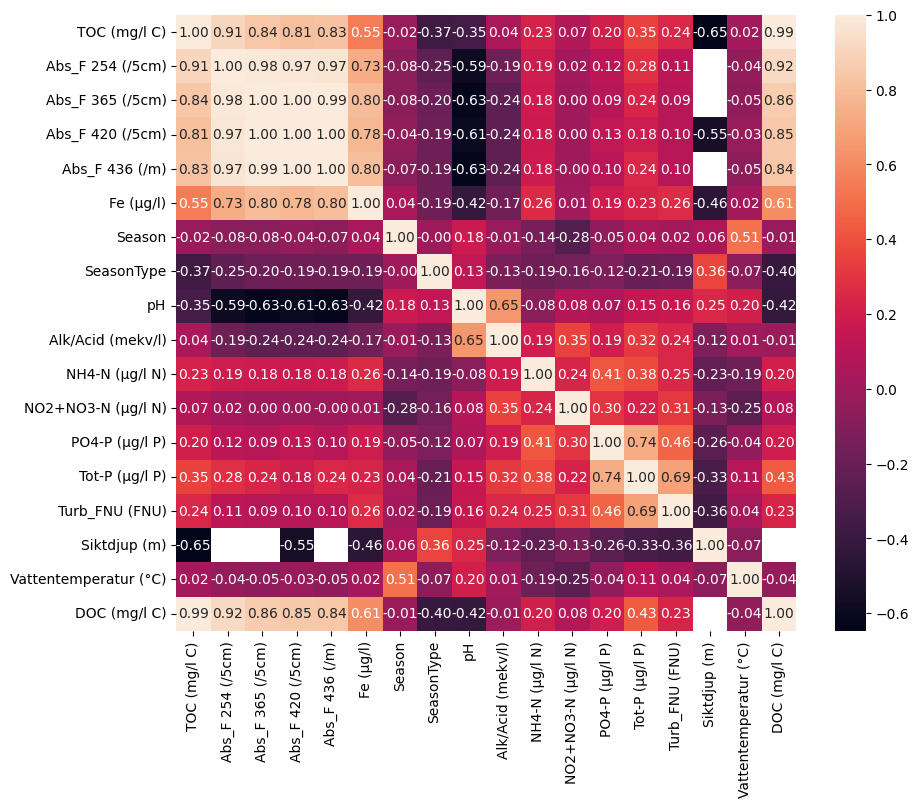

In [ ]:
# Selecting columns that exist in dataframe for correlation matrix
valid_features = [feature for feature in features if feature in df.columns]
# Adding 'DOC (mg/l C)' for correlation matrix
valid_features.append('DOC (mg/l C)')

# Calculating correlation matrix
corr_matrix = df[valid_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

<ipython-input-9-5a0cc2cab171>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


TOC (mg/l C)                          0.994744
Abs_F 254 (/5cm)                      0.919187
Abs_F 365 (/5cm)                      0.863859
Abs_F 420 (/5cm)                      0.848298
Abs_F 436 (/m)                        0.844148
Al (µg/l)                             0.659171
Fe (µg/l)                             0.610976
Tot-N_TNb (µg/l N)                    0.563394
Si (mg/l)                             0.482352
Tot-P (µg/l P)                        0.428274
Kfyll (µg/l)                          0.237586
Turb_FNU (FNU)                        0.228515
Na (mekv/l)                           0.218785
NH4-N (µg/l N)                        0.202854
Cl (mekv/l)                           0.199105
PO4-P (µg/l P)                        0.195628
K (mekv/l)                            0.169286
Kond_25 (mS/m)                        0.105733
Mg (mekv/l)                           0.101023
NO2+NO3-N (µg/l N)                    0.079942
F (mekv/l)                            0.052212
Ca (mekv/l)  

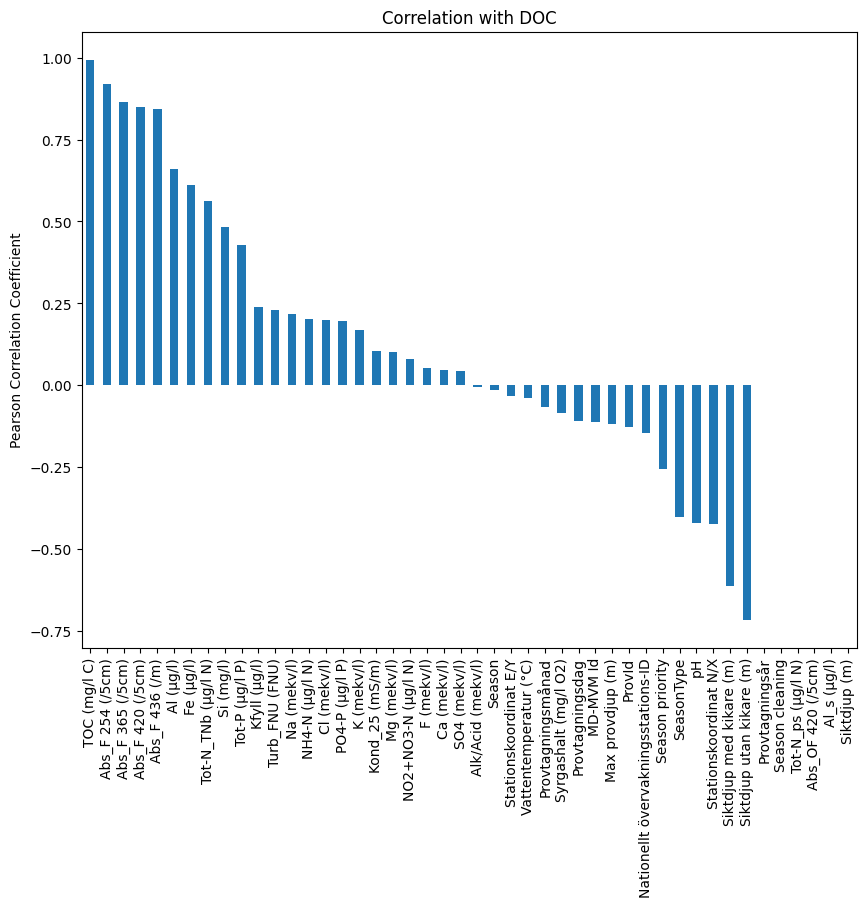

In [ ]:
# Finding correation for all the data features with DOC
doc_column = 'DOC (mg/l C)'

if doc_column in df.columns:
    # Calculating correlation matrix
    correlation_matrix = df.corr(method='pearson')

    # Isolating DOC correlations
    doc_correlations = correlation_matrix[doc_column].drop(doc_column)
    doc_correlations = doc_correlations.sort_values(ascending=False)

    # Displaying correlation coefficients
    print(doc_correlations)

    # Plotting
    plt.figure(figsize=(10, 8))
    doc_correlations.plot(kind='bar')
    plt.title('Correlation with DOC')
    plt.ylabel('Pearson Correlation Coefficient')
    plt.show()